# Import Modules

In [1]:
import pandas as pd

import utils

# Load Data

In [2]:
target_vegetable = "トマト"
train_size = 4000

In [3]:
train = pd.read_csv("./data/train.csv")
train["date"] = pd.to_datetime(train["date"], format="%Y%m%d")

train["year"] = train.date.dt.year
years = pd.get_dummies(train["year"])
train = train.drop(columns="year")
train = pd.concat([train, years], axis=1)

train["month"] = train.date.dt.month
months = pd.get_dummies(train["month"])
train = train.drop(columns="month")
train = pd.concat([train, months], axis=1)

train["weekday"] = train.date.dt.weekday
weekdays = pd.get_dummies(train["weekday"])
train = train.drop(columns="weekday")
train = pd.concat([train, weekdays], axis=1)

areas = pd.get_dummies(train["area"])
train = train.drop(columns="area")
train = pd.concat([train, areas], axis=1)

target_values = utils.get_target_values(train, target_vegetable)
train_x, train_y, test_y, train, test, ss = utils.preprocess_data(target_values, train_size=train_size, T=10)

# Training

In [9]:
future = target_values.shape[0] - train_size
pred_y, _ = utils.pipeline_rnn(train_x, train_y, train, test, test_y, future=future, num_epochs=200)

training loss = 1.0177313089370728
test loss = 0.8981863260269165
training loss = 0.1696859896183014
test loss = 1.099624752998352
training loss = 0.10708082467317581
test loss = 0.7844640612602234
training loss = 0.09373727440834045
test loss = 1.041017770767212
training loss = 0.08847827464342117
test loss = 0.7043909430503845
training loss = 0.08631009608507156
test loss = 0.5459542274475098
training loss = 0.08612941950559616
test loss = 0.6715753674507141
early stop at: 0.3939427137374878


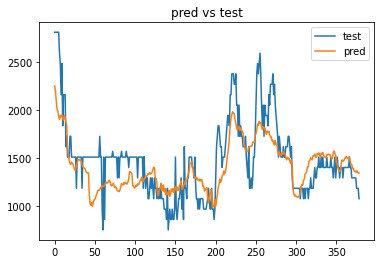

In [10]:
utils.plot_prediction(pred_y, test, ss)

# Terminal Score

In [4]:
utils.get_terminal_score()

training loss = 1.0034608840942383
test loss = 0.7203726172447205
training loss = 0.6321191191673279
test loss = 0.7037242650985718
training loss = 0.24081358313560486
test loss = 2.585444450378418
training loss = 0.21302270889282227
test loss = 0.7599464654922485
training loss = 0.206315279006958
test loss = 0.5275567770004272
training loss = 0.20099082589149475
test loss = 0.6887917518615723
training loss = 0.19762815535068512
test loss = 0.5752851366996765
early stop at: 0.479679673910141
だいこん: 0.479679673910141
training loss = 0.9906743764877319
test loss = 0.8061758279800415
training loss = 0.4985629618167877
test loss = 0.5628146529197693
training loss = 0.29209470748901367
test loss = 3.5121970176696777
training loss = 0.2704451084136963
test loss = 0.6087707877159119
early stop at: 0.5114395618438721
にんじん: 0.5114395618438721
training loss = 0.9952927231788635
test loss = 0.4940340220928192
training loss = 0.48690855503082275
test loss = 3.250150442123413
training loss = 0.14255